<a href="https://colab.research.google.com/github/Dominique-Thorendal-Research/Pairs-Trading/blob/main/Pairs_Trading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pairs Trading Strategy

## 1. Find 2 stocks that are cointegrated

https://www.youtube.com/watch?v=uZcw-CZdTwI

### Brainstorm
**Svenska investment bolag**
- Investor
- Kinnveik
- Industrivärden C

In [ ]:
import pandas as pd
import yfinance as yf
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from itertools import combinations

In [ ]:
tickers = [
    'AAPL', 'MSFT', 'GOOGL', 'AMZN', 'NVDA', 'TSLA', 'META', 'UNH', 'JPM',
    'XOM', 'JNJ', 'V', 'PG', 'HD', 'MA', 'LLY', 'CVX', 'MRK', 'PEP',
    'KO', 'ABBV', 'PFE', 'BAC', 'WMT', 'COST', 'CMCSA', 'TMO', 'ACN', 'CRM',
    'NFLX', 'INTC', 'DIS', 'QCOM', 'MCD', 'SBUX', 'GS', 'MS', 'GE', 'IBM'
]
print(f"Successfully loaded {len(tickers)} S&P 500 tickers.")

Successfully loaded 39 S&P 500 tickers.


In [ ]:
df = yf.download(tickers, start='2020-01-01')['Close']

/tmp/ipython-input-3837736623.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(tickers, start='2020-01-01')['Close']
[*********************100%***********************]  39 of 39 completed


In [ ]:
df

Ticker,AAPL,ABBV,ACN,AMZN,BAC,BRK.B,CMCSA,COST,CRM,CVX,...,PFE,PG,QCOM,SBUX,TMO,TSLA,UNH,V,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,72.468246,69.823448,192.515030,94.900497,30.920330,NaN,38.592060,266.497559,165.251694,92.917877,...,27.955408,106.273247,78.043129,78.221725,321.580139,28.684000,267.026428,183.186234,36.508095,53.661709
2020-01-03,71.763733,69.160683,192.194351,93.748497,30.278324,NaN,38.285839,266.716888,164.440231,92.596519,...,27.805420,105.558502,76.573593,77.766487,318.082214,29.534000,264.324188,181.729340,36.185806,53.230297
2020-01-06,72.335571,69.706505,190.939331,95.143997,30.234945,NaN,37.996643,266.790009,171.644440,92.282753,...,27.769709,105.704903,76.124825,77.153671,320.368103,30.102667,266.159149,181.336365,36.112141,53.639008
2020-01-07,71.995384,69.308861,186.816940,95.343002,30.035412,NaN,38.398319,266.369476,174.167892,91.104362,...,27.676855,105.050415,78.289497,76.917313,322.181122,31.270666,264.552460,180.857101,35.777565,53.200024
2020-01-08,73.153503,69.800079,187.183395,94.598503,30.339054,NaN,38.791439,269.423218,175.484055,90.063698,...,27.898272,105.498215,78.060707,77.810249,322.693481,32.809334,270.130310,183.953018,35.654797,52.397747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-11-17,267.459991,234.000000,241.330002,232.869995,51.480000,NaN,27.219999,912.590027,237.029999,153.110001,...,25.080000,145.820007,166.750000,83.690002,567.159973,408.920013,320.519989,325.750000,102.949997,117.680000
2025-11-18,267.440002,233.869995,240.000000,222.550003,51.639999,NaN,27.360001,895.080017,233.500000,153.619995,...,25.450001,146.990005,165.059998,83.330002,576.030029,401.250000,313.579987,321.179993,101.389999,119.029999
2025-11-19,268.559998,232.910004,241.080002,222.690002,52.020000,NaN,26.870001,890.599976,227.880005,151.699997,...,24.879999,146.990005,166.110001,83.680000,573.789978,403.989990,309.089996,324.119995,100.610001,117.349998


In [ ]:
combi_df = pd.DataFrame(combinations(df.columns,2))
combi_df.columns = ['Stock 1', 'Stock 2']
combi_df

,Stock 1,Stock 2
0,AAPL,ABBV
1,AAPL,ACN
2,AAPL,AMZN
3,AAPL,BAC
4,AAPL,CMCSA
...,...,...
736,UNH,WMT
737,UNH,XOM
738,V,WMT
739,V,XOM


In [ ]:
combi_df['Correlation'] = combi_df.apply(lambda row: np.corrcoef(df[row['Stock 1']], df[row['Stock 2']])[0,1], axis=1)

In [ ]:
combi_df = combi_df [combi_df['Correlation']>0.95]

In [ ]:
combi_df

,Stock 1,Stock 2,Correlation
305,CVX,XOM,0.959922
336,GE,GS,0.952478
338,GE,IBM,0.967540
341,GE,JPM,0.977336
344,GE,MA,0.950521
351,GE,NVDA,0.977569
361,GE,WMT,0.961441
394,GS,JPM,0.982188
401,GS,MS,0.980153
443,IBM,JPM,0.960981


In [ ]:
def do_reg(stock1, stock2):
    X = df[stock1].values
    y = df[stock2].values

    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    alpha, beta = model.params

    residuals = y - (alpha + beta * X[:,1])

    if np.isnan(residuals).any():
        return np.nan

    adf_result = adfuller(residuals)

    return adf_result[0], adf_result[1], beta, alpha



In [ ]:
combi_df[['adf_stat','p_value','beta','alpha']] = combi_df.apply(lambda row:pd.Series(do_reg(row['Stock 1'],row['Stock 2'])),axis=1)

/tmp/ipython-input-2286546503.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combi_df[['adf_stat','p_value','beta','alpha']] = combi_df.apply(lambda row:pd.Series(do_reg(row['Stock 1'],row['Stock 2'])),axis=1)
/tmp/ipython-input-2286546503.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combi_df[['adf_stat','p_value','beta','alpha']] = combi_df.apply(lambda row:pd.Series(do_reg(row['Stock 1'],row['Stock 2'])),axis=1)
/tmp/ipython-input-2286546503.py:1: SettingWithCopyWarning: 
A value is trying to 

In [ ]:
combi_df[combi_df['p_value']<0.01].sort_values(by='adf_stat')

,Stock 1,Stock 2,Correlation,adf_stat,p_value,beta,alpha
463,IBM,WMT,0.967288,-4.259782,0.000521,0.343628,6.420404
585,MA,V,0.988455,-4.191531,0.000681,0.588261,7.709632
453,IBM,NVDA,0.954001,-4.126249,0.000876,0.905740,-77.332435
446,IBM,MA,0.956547,-4.083408,0.001032,1.493782,176.502202
738,V,WMT,0.953041,-3.784290,0.003072,0.364293,-30.767005
443,IBM,JPM,0.960981,-3.693946,0.004199,1.022081,7.686651
529,JPM,WMT,0.959859,-3.643438,0.004983,0.320605,6.292539
338,GE,IBM,0.967540,-3.606872,0.005631,0.759879,68.536186
351,GE,NVDA,0.977569,-3.584918,0.006056,0.728916,-19.430827
512,JPM,MA,0.961904,-3.556134,0.006657,1.412348,173.009347


In [ ]:
spread = df['WMT'] - (6.420404 + 0.343628 * df['IBM'])

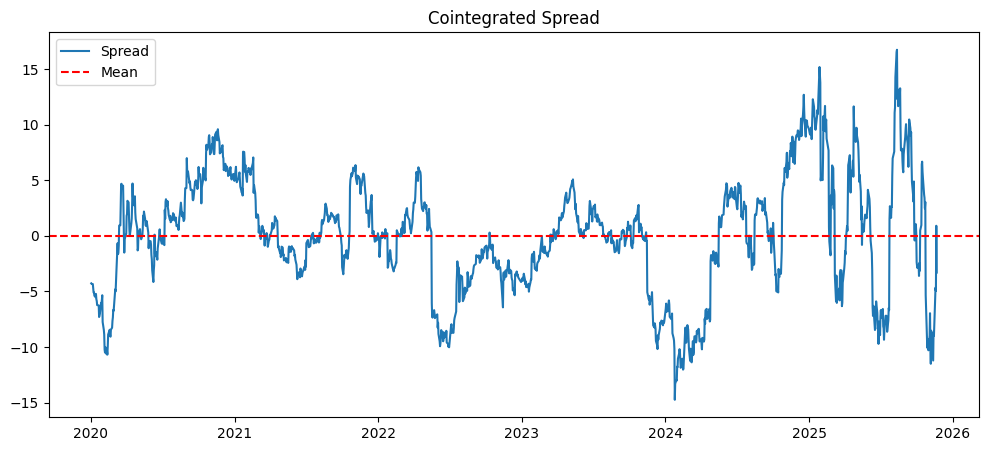

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12,5))
plt.plot(spread, label = 'Spread')
plt.axhline(spread.mean(), color = 'r', linestyle = '--', label = 'Mean')
plt.legend()
plt.title('Cointegrated Spread')
plt.show()